<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/first_look_into_datasets_and_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

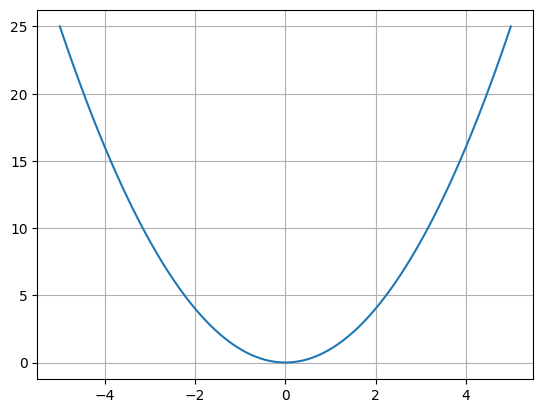

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)  #start | stop | number
print(x)
y = x**2
plt.plot(x, y)
plt.grid(True)
plt.show()

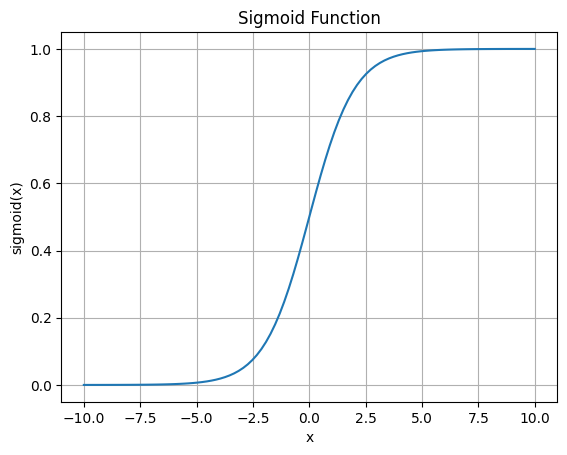

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10, 100)  #start | stop | number

y = sigmoid(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

[[ 1.68976749e+00 -1.40824123e+00]
 [ 1.53028665e+00 -1.45984815e+00]
 [-1.17504152e+00 -1.44763291e+00]
 [-2.58539507e+00  9.63532238e-01]
 [ 1.37224580e+00  4.40695372e-01]
 [ 7.31936138e-01  8.49752970e-01]
 [-2.10684207e+00 -1.56005160e-01]
 [-9.36016045e-01  5.43282487e-01]
 [-1.64699537e+00  4.93409195e-01]
 [ 4.25361481e-01  2.41426917e-01]
 [ 8.55819924e-01 -4.30645568e-01]
 [ 1.67660005e+00 -1.71348441e+00]
 [-2.06987792e+00  2.52602241e-01]
 [-7.95777151e-01  4.93854713e-02]
 [ 1.77079592e+00  1.53557656e+00]
 [ 3.65788291e-01  2.23297154e+00]
 [-5.27587135e-02 -2.18236826e+00]
 [ 5.74030019e-01  4.47236811e-01]
 [-1.06467498e+00 -7.52371616e-01]
 [ 2.24658823e+00 -1.51455024e+00]
 [-6.28449323e-01 -2.07252229e-01]
 [-1.75906144e+00  7.58449497e-01]
 [-1.15587568e+00 -1.94994197e+00]
 [ 8.36468813e-01  9.89269810e-01]
 [-1.12970978e+00 -5.07833439e-01]
 [ 1.13127571e-01 -8.28167340e-01]
 [ 8.41178220e-01 -8.20860843e-01]
 [-9.88267315e-01  1.87708853e+00]
 [-1.17843051e-01 -1

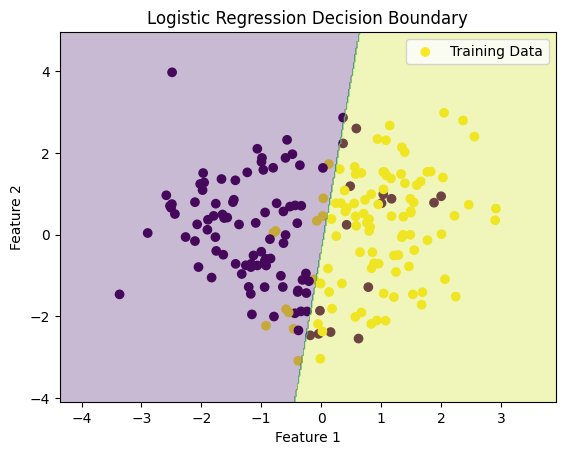

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, Y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=2, random_state=42)
# redundant = powtarzanie się | features = oddzielone o 2

print(X, Y)


def crate_train_and_test_sets(X, Y):
    random.seed(42)

    X = np.array(X)
    Y = np.array(Y)

    indices = np.arange(len(X))
    print(indices)

    split_point = int(0.8*len(X))

    train_indices = indices[:split_point]
    test_indices = indices[split_point:]

    X_train = X[indices]
    Y_train = Y[indices]
    X_test = X[indices]
    Y_test = Y[indices]

    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = crate_train_and_test_sets(X, Y)

def zscore_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X-mean)/std
    return X_normalized

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

print(Y_test_pred)

def plot_regression():
    # Create the plot
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis', label='Training Data')

    # Create meshgrid for decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Predict for meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot test data (optional)
    # plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='viridis', marker='x', label='Test Data')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

plot_regression()